In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [11]:
cdc=pd.read_csv("CustomerData_Classification.csv")
cdc

CustomerID  City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0           1001     1             2              3              8     210   
1           1002     1             2              3              6     442   
2           1003     1             4              3              5     424   
3           1004     1             1              6              6     261   
4           1005     1             3              6              9     422   
5           1006     1             2              3              4     378   
6           1007     1             3              8             12     369   
7           1008     1             2              6              8     404   
8           1009     1             4              6              9     420   
9           1010     2             3              5              6     333   
10          1011     1             1              5              5     323   
11          1012     1             3              4              9     167   
12          1013     1             1              4              4     381   
13          1014     1             4              5              7     399   
14          1015     1             2              4              7     444   
15          1016     1             2              3              5     371   
16          1017     1             1              6              6     355   
17          1018     1             1              7              7     346   
18          1019     1             2              6              7     211   
19          1020     1             2              4              7     278   
20          1021     1             3              4             10     448   
21          1022     1             2              3              6     447   
22          1023     1             1              8              8     471   
23          1024     1             1              4              4     189   
24          1025     1             2              5              7     427   
25          1026     1             2              5              8     351   
26          1027     1             2              6              6     453   
27          1028     1             4              3              7     418   
28          1029     1             3              3             13     424   
29          1030     1             5              2              7     444   
...          ...   ...           ...            ...            ...     ...   
3179        4180     1             2              3              5     351   
3180        4181     1             3              2             20     346   
3181        4182     1             1              8              8     350   
3182        4183     1             2              2              5     329   
3183        4184     1             2              6              6     358   
3184        4185     1             5              3              9     397   
3185        4186     1             5              1             13     456   
3186        4187     1             2              3              5     367   
3187        4188     1             1              5              5     425   
3188        4189     1             2              4              6     417   
3189        4190     1             4              4              7     176   
3190        4191     1             1              5              5     395   
3191        4192     1             1              6              6     220   
3192        4193     1             1              5              5     388   
3193        4194     1             5              5              7     442   
3194        4195     1             2              4              6     360   
3195        4196     1             2              4              7     226   
3196        4197     1             1              6              6     273   
3197        4198     1             1              6              6     135   
3198        4199     1      

In [12]:
cdc.City.unique()

array([1, 2])

In [13]:
newcdc=cdc.drop(columns="CustomerID")

In [14]:
newcdc.City=newcdc.City.astype(np.object)
newcdc.dtypes
#newcdc.loc[newcdc.FavoriteChannelOfTransaction=="Uniform","FavoriteChannelOfTransaction"]=1
newcdc
#newcdc.FavoriteChannelOfTransaction.replace({"Favorite":2},inplace=True)
newcdc
# recode values in fav channel and favgame col
newcdc.FavoriteChannelOfTransaction.replace({"Uniform":1,"Favorite":2},inplace=True)

newcdc.FavoriteGame.replace({"Uniform":1,"Favorite":2,'NONE':3},inplace=True)
newcdc.FavoriteChannelOfTransaction=newcdc.FavoriteChannelOfTransaction.astype(np.object)
newcdc.FavoriteGame=newcdc.FavoriteGame.astype(np.object)

#newcdc.Churned=newcdc.Churned.astype(np.object)
print(newcdc.dtypes)
newcdc

City                            object
NoOfChildren                     int64
MinAgeOfChild                    int64
MaxAgeOfChild                    int64
Tenure                           int64
FrquncyOfPurchase                int64
NoOfUnitsPurchased               int64
FrequencyOFPlay                  int64
NoOfGamesPlayed                  int64
NoOfGamesBought                  int64
FavoriteChannelOfTransaction    object
FavoriteGame                    object
Churned                          int64
dtype: object


City  NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  \
0       1             2              3              8     210   
1       1             2              3              6     442   
2       1             4              3              5     424   
3       1             1              6              6     261   
4       1             3              6              9     422   
5       1             2              3              4     378   
6       1             3              8             12     369   
7       1             2              6              8     404   
8       1             4              6              9     420   
9       2             3              5              6     333   
10      1             1              5              5     323   
11      1             3              4              9     167   
12      1             1              4              4     381   
13      1             4              5              7     399   
14      1             2              4              7     444   
15      1             2              3              5     371   
16      1             1              6              6     355   
17      1             1              7              7     346   
18      1             2              6              7     211   
19      1             2              4              7     278   
20      1             3              4             10     448   
21      1             2              3              6     447   
22      1             1              8              8     471   
23      1             1              4              4     189   
24      1             2              5              7     427   
25      1             2              5              8     351   
26      1             2              6              6     453   
27      1             4              3              7     418   
28      1             3              3             13     424   
29      1             5              2              7     444   
...   ...           ...            ...            ...     ...   
3179    1             2              3              5     351   
3180    1             3              2             20     346   
3181    1             1              8              8     350   
3182    1             2              2              5     329   
3183    1             2              6              6     358   
3184    1             5              3              9     397   
3185    1             5              1             13     456   
3186    1             2              3              5     367   
3187    1             1              5              5     425   
3188    1             2              4              6     417   
3189    1             4              4              7     176   
3190    1             1              5              5     395   
3191    1             1              6              6     220   
3192    1             1              5              5     388   
3193    1             5              5              7     442   
3194    1             2              4              6     360   
3195    1             2              4              7     226   
3196    1             1              6              6     273   
3197    1             1              6              6     135   
3198    1             1              5              5     347   
3199    1             1              6              6     352   
3200    1             2              7              8     313   
3201    1             3              2              6     424   
3202    1             2              5              7     424   
3203    1             1              4              4     431   
3204    1             2              4              6     365   
3205    1             2              2              5     348   
3206    1             2              5              7     341   
3207    1             2              6              7     368   
3208    1             3              2  

In [15]:
x=newcdc.drop(columns="Churned")
y=newcdc["Churned"]
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.3,random_state=30)
print("train\n",yTrain.value_counts(normalize=True))
print("test\n",yTest.value_counts(normalize=True))

train
 1    0.508905
0    0.491095
Name: Churned, dtype: float64
test
 1    0.515057
0    0.484943
Name: Churned, dtype: float64


In [16]:
newcdc.Churned.value_counts(normalize=True)
xTrain.dtypes

City                            object
NoOfChildren                     int64
MinAgeOfChild                    int64
MaxAgeOfChild                    int64
Tenure                           int64
FrquncyOfPurchase                int64
NoOfUnitsPurchased               int64
FrequencyOFPlay                  int64
NoOfGamesPlayed                  int64
NoOfGamesBought                  int64
FavoriteChannelOfTransaction    object
FavoriteGame                    object
dtype: object

In [19]:
#buildinf  a losgistic model
lgr=LogisticRegressionCV()
lgr.fit(xTrain,yTrain)
lgr.coef_

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([[-1.26634093e-04,  7.05138870e-04,  2.01613796e-03,
         9.54533815e-04,  3.45329738e-04,  3.01937416e-05,
        -2.75346605e-03,  4.32263893e-06, -6.34538439e-04,
        -5.89925854e-04, -6.97735789e-04,  1.43594590e-04]])

In [20]:
pred_train=lgr.predict(xTrain)
print("Ac on train",sklearn.metrics.accuracy_score(yTrain,pred_train))
#predict on test
pred_test=lgr.predict(xTest)
print("Ac on test",sklearn.metrics.accuracy_score(yTest,pred_test))


Ac on train 0.5071237756010686
Ac on test 0.49117341640706125


In [21]:
sklearn.metrics.confusion_matrix(yTrain,pred_train)

array([[235, 868],
       [239, 904]])

In [24]:
!pip install scikit-plot

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x7f5c33c0e4e0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution')': /packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError("bad handshake: SysCallError(104, 'ECONNRESET')"))': /packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', OSError("(104, 'ECONNRESET')"))': /packages/7c/47/32520e259340c140a4ad27c1b97050dd3254fdc517b1d59974d47037510e/scikit_plot-0.3.7-py3-none-any.whl
  

In [25]:
import scikitplot as skplt
import matplotlib.pyplot as plt

/home/bhargav/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


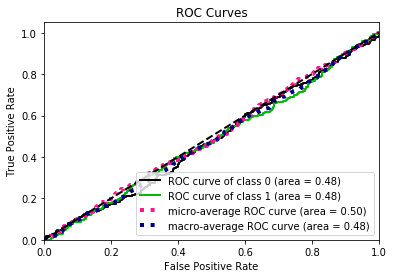

In [27]:
y_prob=lgr.predict_proba(xTest)
skplt.metrics.plot_roc_curve(yTest,y_prob)